## Example 5: Extractive Distillation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from thermo_models.RaoultsLawModel import *
from distillation.DistillationModel import DistillationModel
import utils.AntoineEquation as AE
from IPython.display import clear_output
from tqdm import tqdm
from distillation.DistillationDoubleFeed import *
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive, Button, VBox, HBox, Output
from IPython.display import clear_output
from thermo_models.VanLaarModel import *
from distillation.residue_curves import *

In [2]:
#Acetone (1 - Light) Methanol (2 - Intermediate) Water (3 - Heavy)
#Table A.6 in Knapp 
A_ij = {
    (1,1):0,
    (1,2):182.0,
    (1,3):795.0,
    (2,1):196,
    (2,2):0,
    (2,3):332.6,
    (3,1):490.0,
    (3,2):163.80,
    (3,3):0
}

#Different definition of Antoine where we have to take the negative of B
Acet_A = 21.3099; Acet_B = 2801.53; Acet_C = -42.875
Meth_A = 23.4832; Meth_B = 3634.01; Meth_C = -33.768
#Assuming P < 2 atm
Water_A = 23.2256; Water_B = 3835.18; Water_C = -45.343

#Kanapp Thesis Figure 3.8 uses ln form of Antoine
AcetoneAntoine = AE.AntoineEquationBaseE(Acet_A,Acet_B,Acet_C)
MethanolAntoine = AE.AntoineEquationBaseE(Meth_A, Meth_B, Meth_C)
WaterAntoine = AE.AntoineEquationBaseE(Water_A,Water_B,Water_C)
        
P_sys = 101325
# Create a Raoult's law object
AceMethWaterSys = VanLaarModel(num_comp = 3, P_sys = P_sys, A_coeff = A_ij, comp_names = ["Acetone","Methanol","Water"], partial_pressure_eqs = [AcetoneAntoine, MethanolAntoine, WaterAntoine])


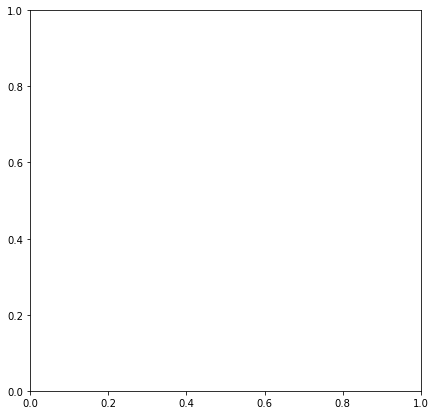

In [3]:
out_residue = Output()
rcm = residue_curve(AceMethWaterSys)
fig, ax = plt.subplots(1,1,figsize= (7,7))
#rcm.plot_residue_curve_og(ax,15)

#### Demo 2

[0.1970129  0.49446133 0.30852577] [ 0.3679619   0.68677779 -0.05473969]
[0.22416872 0.35319622 0.42263506] [0.40921786 0.47216349 0.11861865]
[0.28787253 0.26000012 0.45212735] [0.50599865 0.3305771  0.16342424]
[0.35806299 0.18421087 0.45772614] [0.61263416 0.21543574 0.17193009]
[0.41214101 0.1299452  0.45791379] [0.69479115 0.13299366 0.17221518]
[0.44431817 0.09801966 0.45766217] [0.74367569 0.08449141 0.17183291]
[0.46056608 0.08181818 0.45761574] [0.76836    0.05987762 0.17176238]
[0.46808497 0.07427047 0.45764455] [0.77978294 0.04841091 0.17180615]
[0.47142548 0.07090178 0.45767274] [0.78485794 0.04329309 0.17184897]
[0.47288346 0.0694278  0.45768874] [0.78707295 0.04105378 0.17187327]
[0.47351501 0.06878853 0.45769646] [0.78803242 0.04008258 0.171885  ]
[0.4737877  0.06851235 0.45769995] [0.7884467  0.03966299 0.17189031]
[0.47390529 0.06839322 0.45770149] [0.78862534 0.03948201 0.17189265]
[0.47395596 0.06834188 0.45770216] [0.78870233 0.03940401 0.17189366]
[0.47397779 0.068

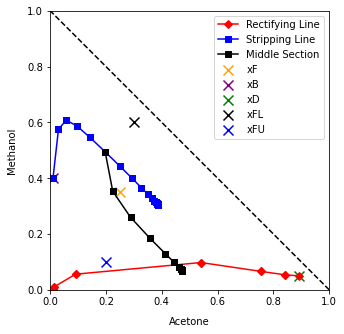

In [6]:
fig, ax = plt.subplots(1,1,figsize= (5,10)) 
#Arbitrary right now
zF = np.array([0.25, 0.35, 0.4])
xFL = np.array([0.3, 0.6, 0.1])
xFU = np.array([0.2, 0.1, 0.7])
xD = np.array([0.89, 0.05, 0.06]) 
xB = np.array([0.01, 0.40,0.59])
R = 3
Fr = 2.5
distillation_model = DistillationModelDoubleFeed(AceMethWaterSys, Fr = Fr, zF = zF, xFL = xFL, xFU = xFU, xD = xD, xB = xB, reflux = R)
distillation_model.plot_rect_strip_comp(ax, middle_start = 10) 